In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
!pip install --upgrade scikit-learn

In [2]:
#loading the data
data = pd.read_csv(r'/content/Clustering.csv')

In [3]:
#importing required libraries
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
#taking a quick look at the dara
print('the shape of the data is:', data.shape)
data.head()
data.describe()

the shape of the data is: (8950, 18)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data = data.drop(columns = 'CUST_ID', axis = 1)

In [7]:
#checking for the null values
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
#finding a method to fill these values;
data = data.interpolate()
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

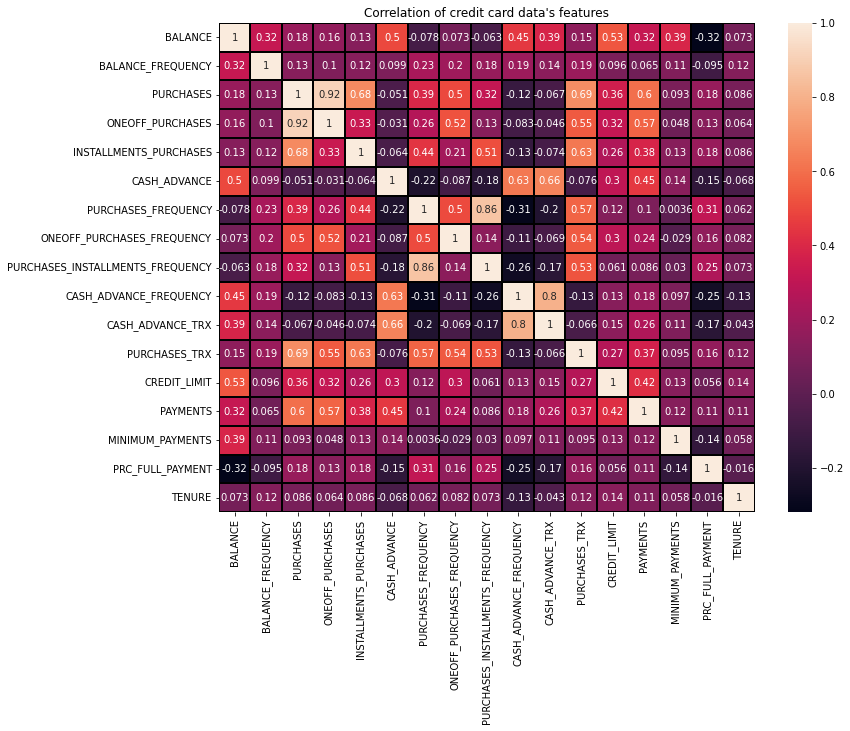

In [9]:
#finding the correlation between them
data_correlate = data.corr()
plt.figure(figsize = (12, 9))
sns.heatmap(data_correlate, linecolor = 'black', linewidth = 1, annot = True)
plt.title('Correlation of credit card data\'s features')
plt.show()

In [10]:
#dealing with the outliers:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[0.73198937 0.24943448 0.42489974 ... 0.30931497 0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.08825036 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.10142893 0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.33364691 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.34501037 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.33114491 0.52555097 4.12276757]]


In [11]:
data_outlier_free = pd.DataFrame(data[(z < 3).all(axis=1)], columns = data.columns)

In [12]:
print(data_outlier_free.shape)
data_outlier_free.head()

(7433, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,436.038012,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
#Now standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_outlier_free)
data_standardized = pd.DataFrame(data_standardized, columns = data.columns)
data_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809720,-0.335494,-0.641527,-0.543552,-0.448135,-0.543884,-0.805290,-0.668856,-0.698435,-0.690747,-0.587329,-0.665326,-1.021782,-0.762965,-0.568225,-0.531569,0.311998
1,1.273134,0.090772,-0.734563,-0.543552,-0.636673,4.671774,-1.225838,-0.668856,-0.910691,0.883779,0.427635,-0.797605,1.021919,1.952976,0.617083,0.232555,0.311998
2,0.807149,0.517039,0.019451,0.430771,-0.636673,-0.543884,1.297443,2.808074,-0.910691,-0.690747,-0.587329,-0.003933,1.192228,-0.470387,0.051570,-0.531569,0.311998
3,0.261344,-1.188028,0.727299,1.345438,-0.636673,-0.377295,-1.015565,-0.379113,-0.910691,-0.165907,-0.333588,-0.731466,1.192228,-0.903455,-0.191439,-0.531569,0.311998
4,-0.297952,0.517039,-0.718960,-0.523390,-0.636673,-0.543884,-1.015565,-0.379113,-0.910691,-0.690747,-0.587329,-0.731466,-0.953659,-0.431215,-0.434449,-0.531569,0.311998


Using elbow method and silhouette' average method to find both the number of clusters. This is as follows.

In [14]:
#Now for k means algorithm of clustering we need a method to know the number of clusters.
#using elbow method to determine the clusters
#consider upto 30 clusters
num_clusters = 30
n_inertias = np.zeros((1, num_clusters))
from sklearn.cluster import KMeans
for i in range(0, num_clusters):
    k_means = KMeans(i+1)
    k_means.fit(data_standardized)
    n_inertias[0, i] = k_means.inertia_

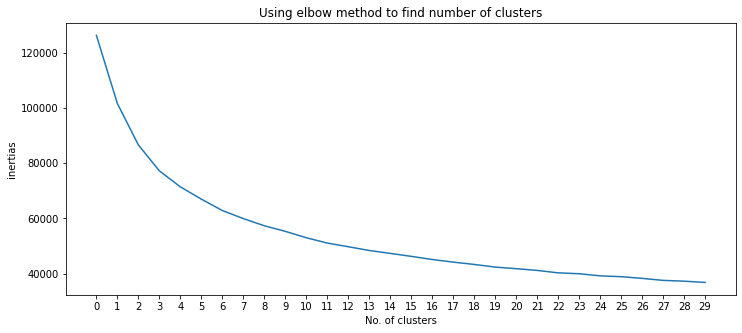

In [15]:
plt.figure(figsize =  (12, 5))
plt.plot(n_inertias.flatten())
plt.xticks(range(0, num_clusters, 1))
plt.title('Using elbow method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('inertias')
plt.draw()

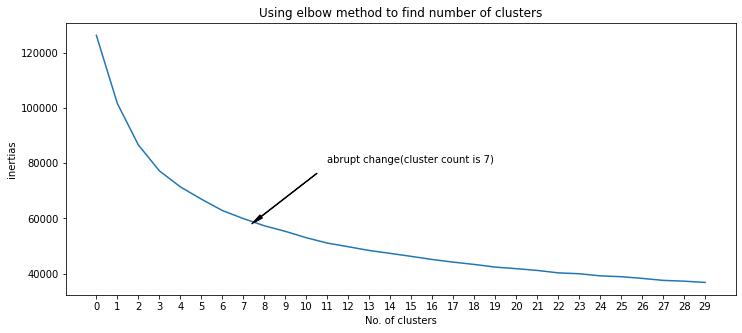

In [16]:
plt.figure(figsize =  (12, 5))
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

plt.annotate(
    "abrupt change(cluster count is 7)", xy=(7, 55700),
    xytext=(11, 80000),
    arrowprops=arrow_properties)
plt.plot(n_inertias.flatten())
plt.xticks(range(0, num_clusters, 1))
plt.title('Using elbow method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('inertias')
plt.show()

The optimum number of clusters that is calculated by elbow method for kmeans is 7.

Now using the silhouette's average method

In [17]:
#now using average sillhoute's method:
from sklearn.metrics import silhouette_score
silhouette_scores = []
num_clusters_list = []
for n_clusters in range(2,30):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_standardized)
    centers = clusterer.cluster_centers_

    silhouette_scores.append(silhouette_score (data_standardized, preds, metric='euclidean'))
    num_clusters_list.append(n_clusters)

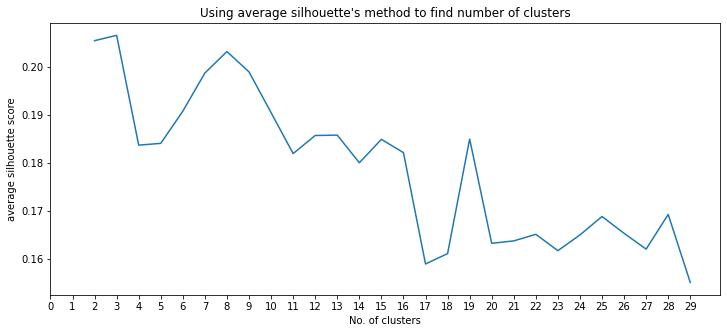

In [18]:
plt.figure(figsize = (12, 5))
plt.plot(num_clusters_list, silhouette_scores)
plt.xticks(range(0, 30, 1))
plt.title('Using average silhouette\'s method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('average silhouette score')
plt.show()

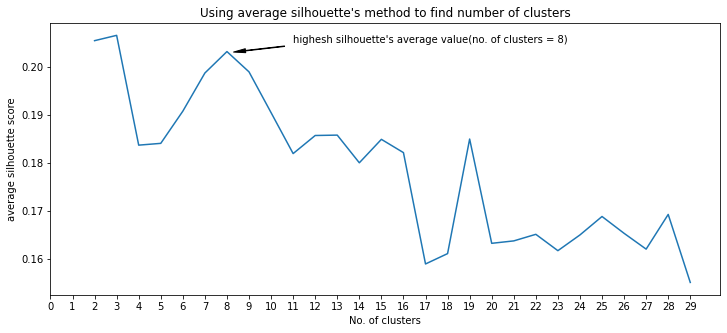

In [19]:
plt.figure(figsize = (12, 5))
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

plt.annotate(
    "highesh silhouette's average value(no. of clusters = 8)", xy=(8, 0.203),
    xytext=(11, 0.205),
    arrowprops=arrow_properties)
plt.plot(num_clusters_list, silhouette_scores)
plt.title('Using average silhouette\'s method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('average silhouette score')
plt.xticks(range(0, 30, 1))
plt.show()

The optimum number of clusters calculated by silhouette's average method is 8.

1.**Using K Means**(with clusters = 7)

In [20]:

k_means_7 = KMeans(7)
k_means_7.fit(data_standardized)
k_means_7_labels = k_means_7.labels_

The labels obtained by the kmeans algorithm is saved in k_means_7_labels. now saving the output into a separate data frame.

In [21]:
data_out_1 = pd.concat([data_outlier_free, pd.DataFrame({'clusters_kmeans7': k_means_7_labels})], axis = 1)

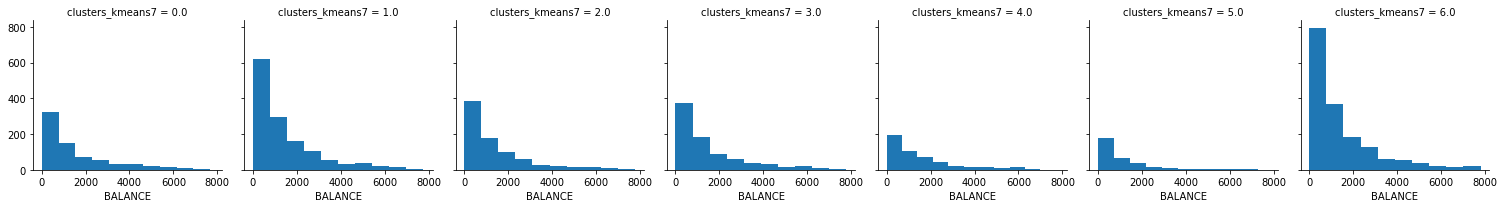

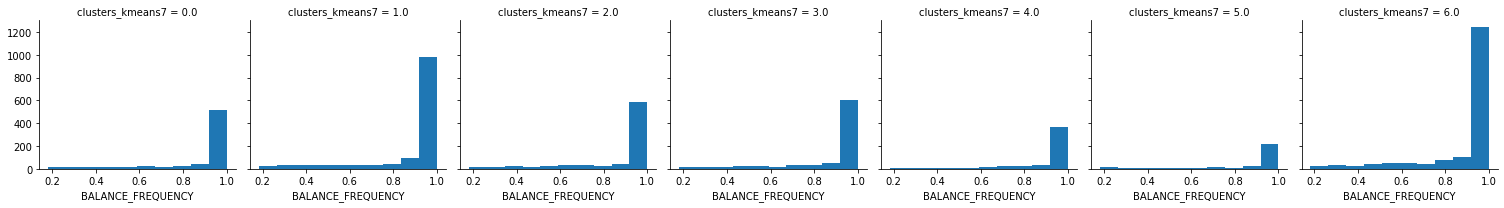

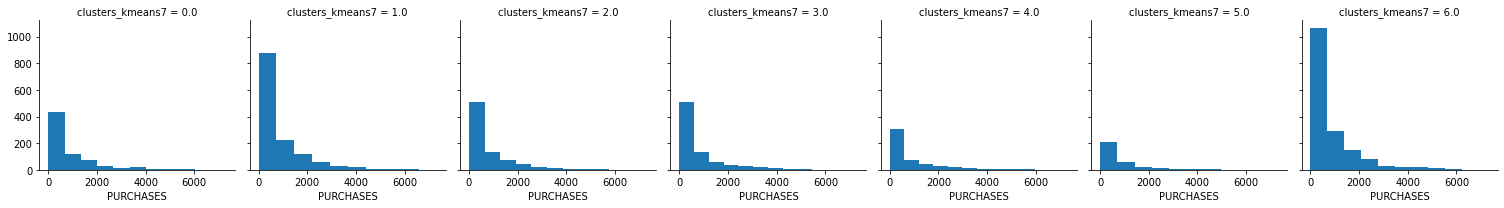

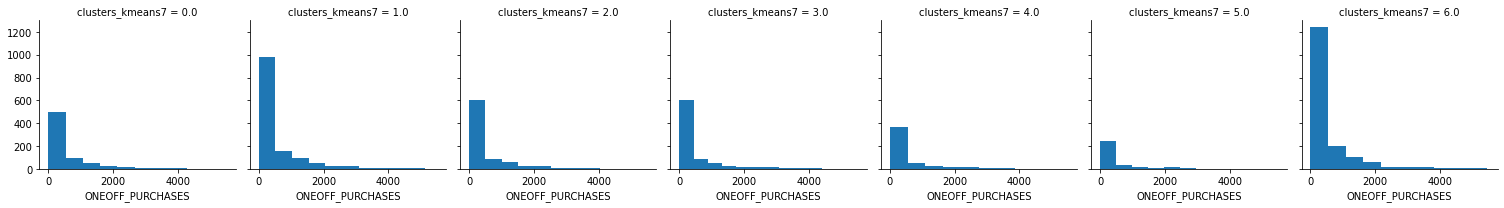

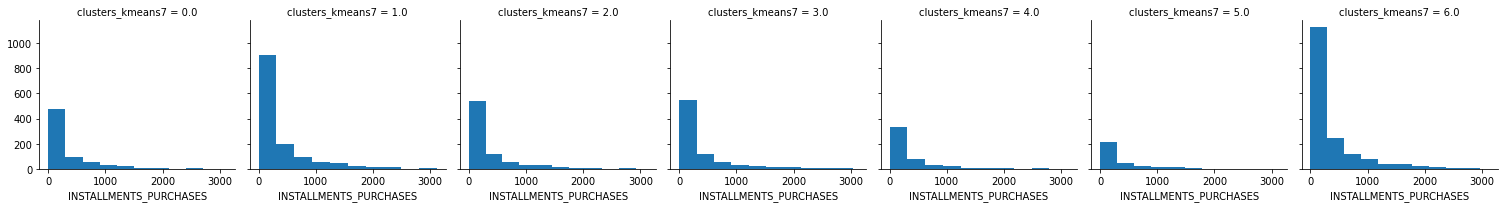

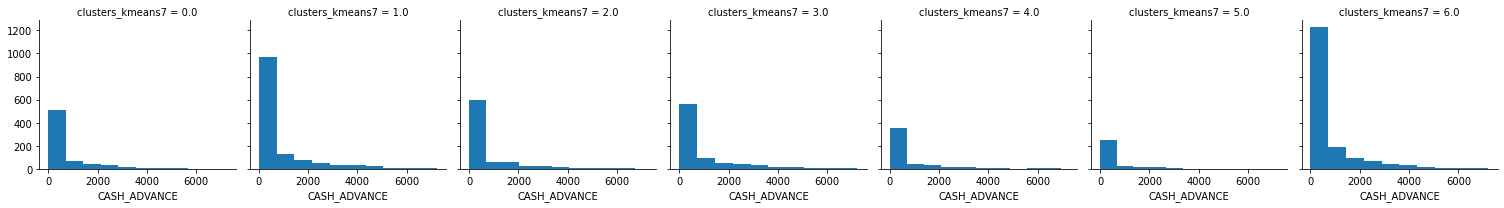

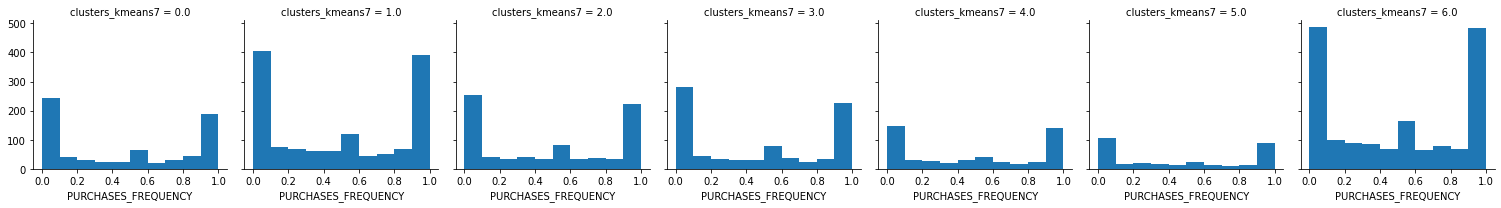

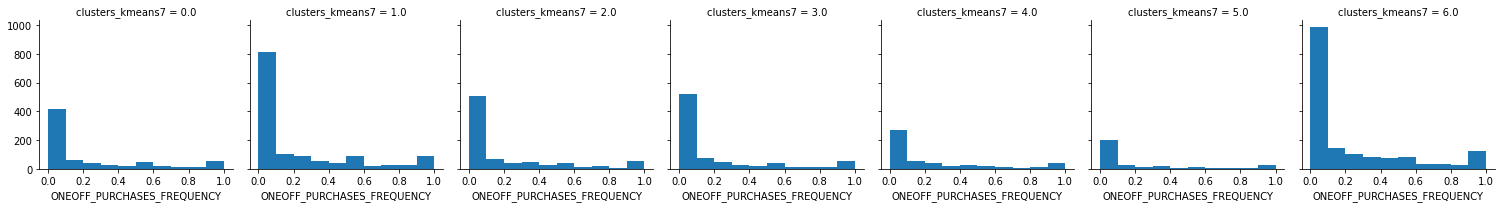

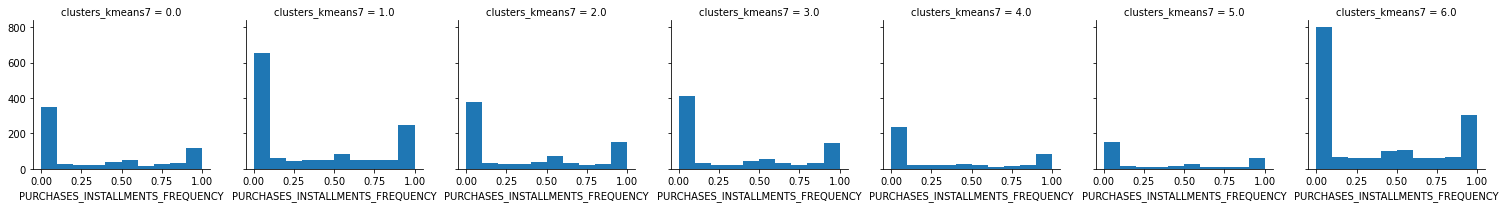

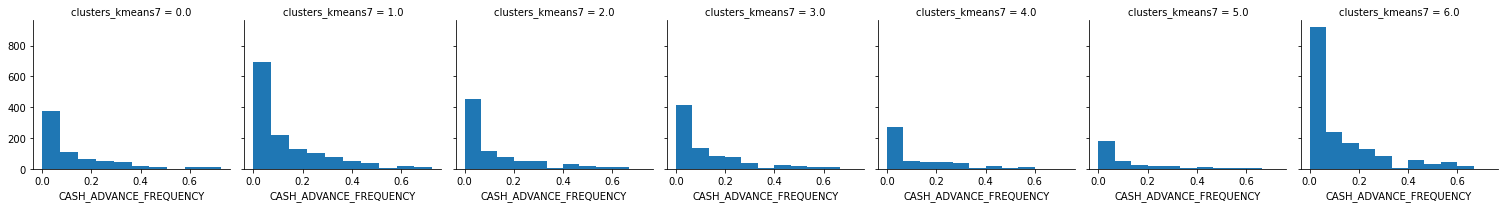

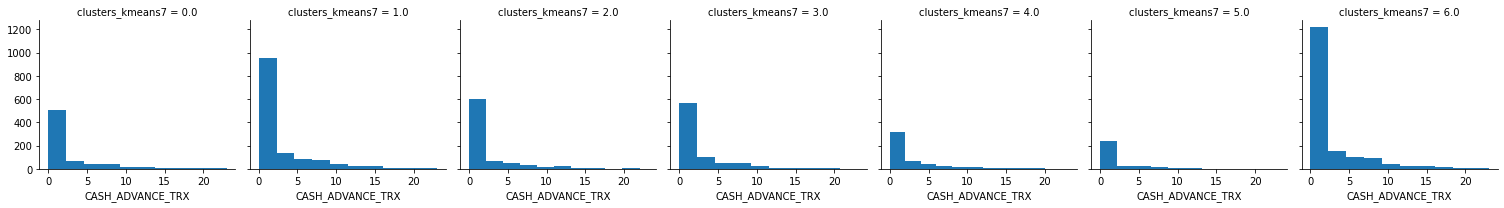

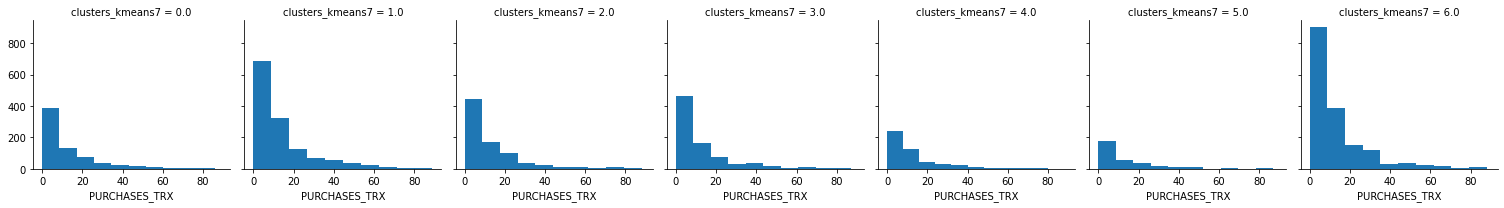

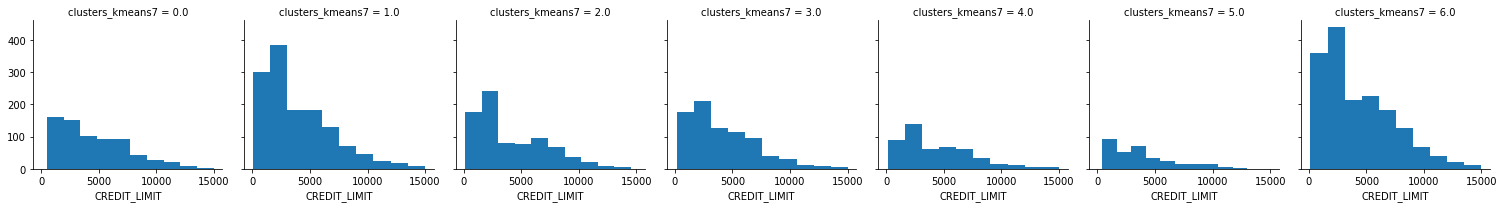

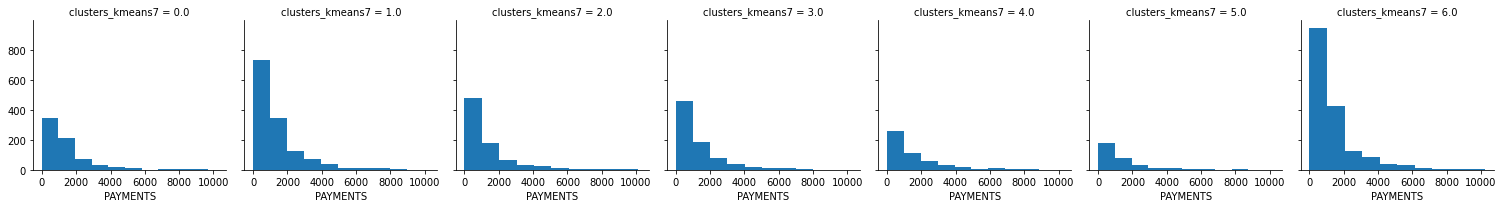

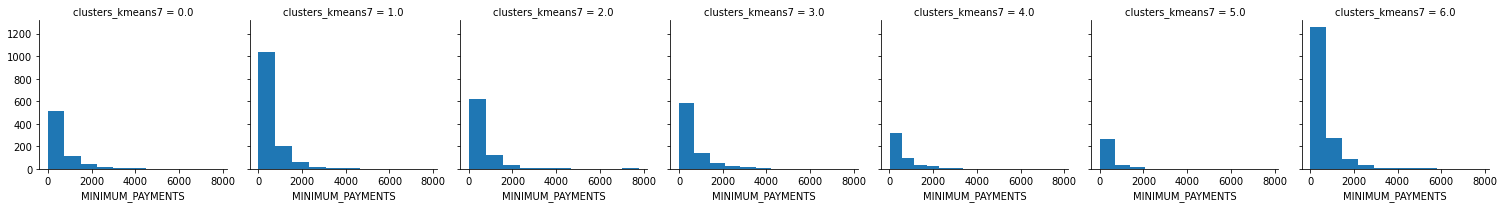

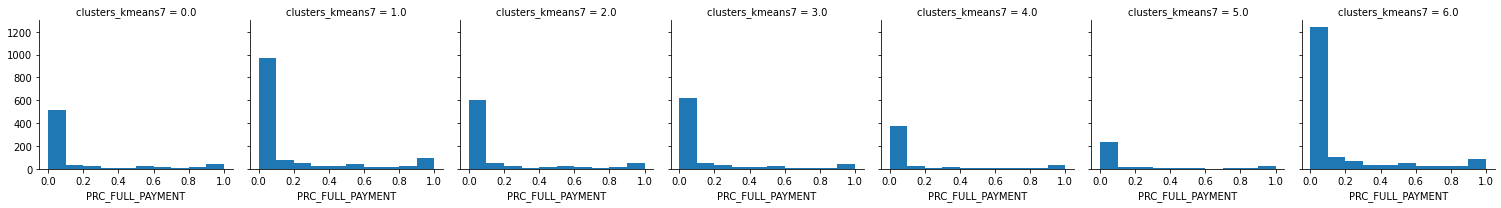

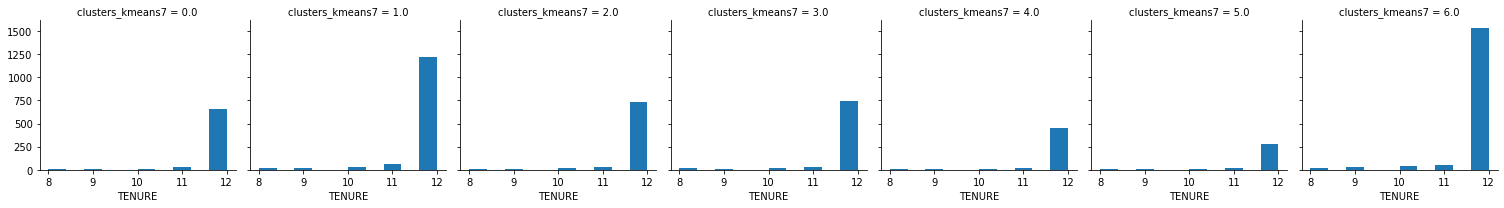

In [22]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_1, col = 'clusters_kmeans7')
    g.map(plt.hist, cols)

*Using PCA to visualize the obtainted clusters.*, using dimensionality reduction technique PCA to visualise the multidimensional array 

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
affinities = 1 - cosine_similarity(data_standardized)

pca = PCA(2)
pca.fit(affinities)
see_PCA = pca.transform(affinities)

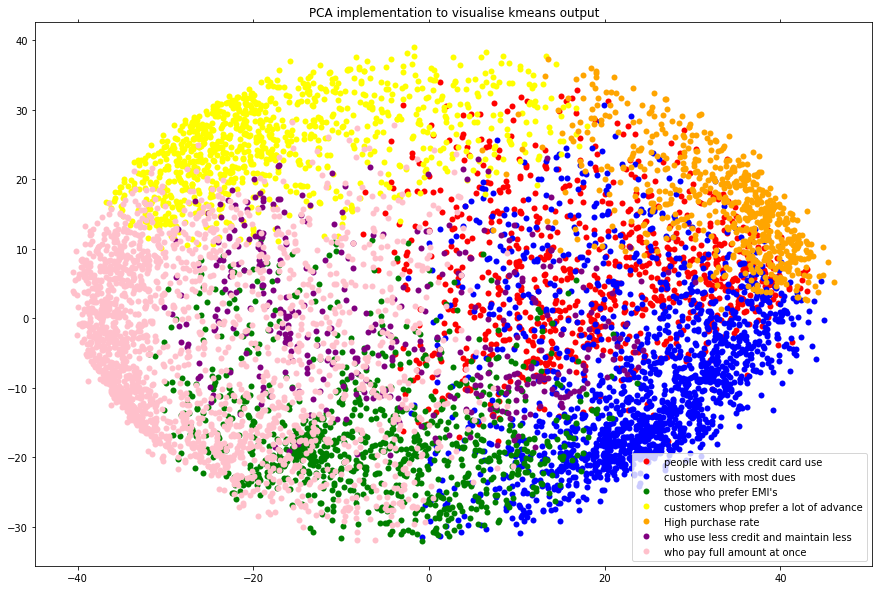

In [24]:
x, y = see_PCA[:, 0], see_PCA[:, 1]

colors = {0: 'red', 
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6: 'pink'}

names = {0: 'people with less credit card use', 
         1: 'customers with most dues', 
         2: 'those who prefer EMI\'s', 
         3: 'customers whop prefer a lot of advance', 
         4: 'High purchase rate',
         5: 'who use less credit and maintain less',
         6: 'who pay full amount at once'}
  
df = pd.DataFrame({'x': x, 'y':y, 'labels':k_means_7_labels}) 
groups = df.groupby('labels')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("PCA implementation to visualise kmeans output")
plt.show()

2.**kMEANS**(using number of cluster = 8)

In [25]:
k_means_8 = KMeans(8)
k_means_8.fit(data_standardized)
k_means_8_labels = k_means_8.labels_

In [26]:
data_out_2 = pd.concat([data_out_1, pd.DataFrame({'clusters_kmeans8': k_means_8_labels})], axis = 1)

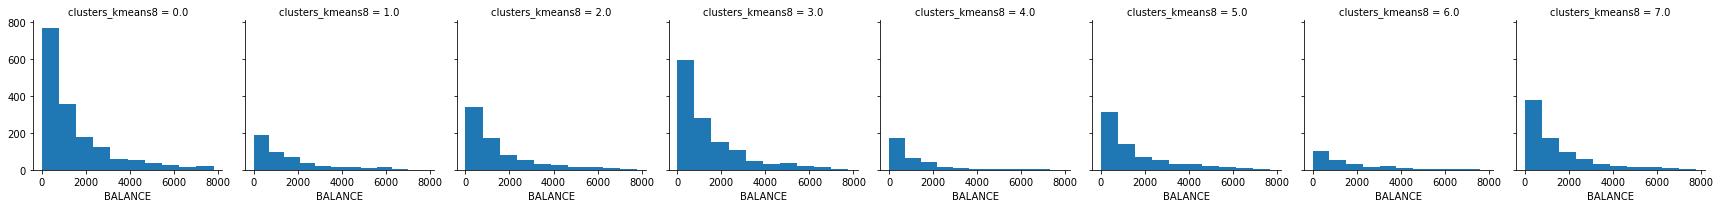

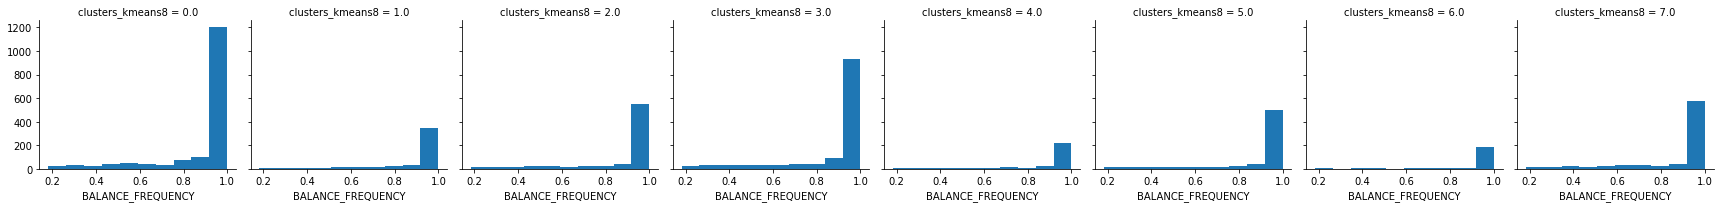

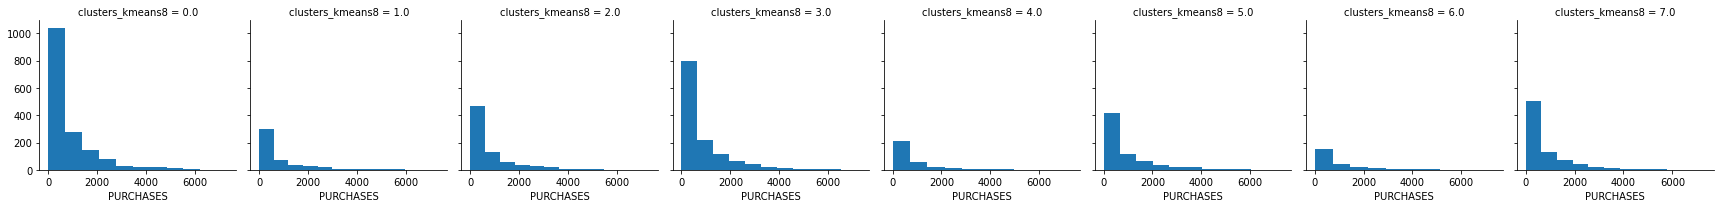

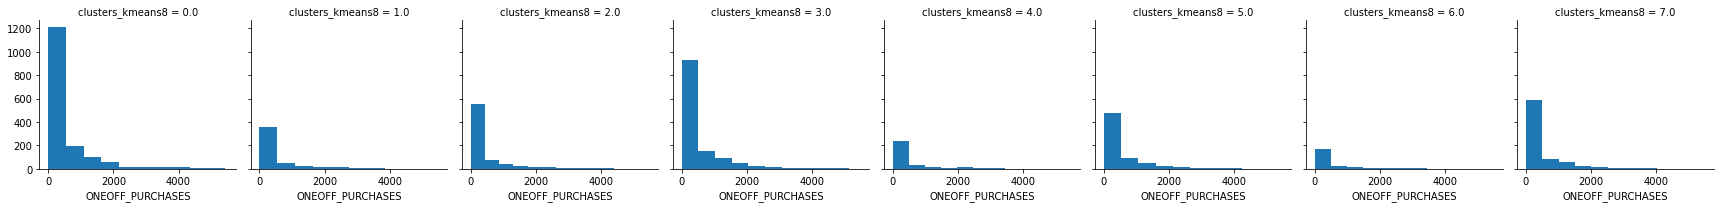

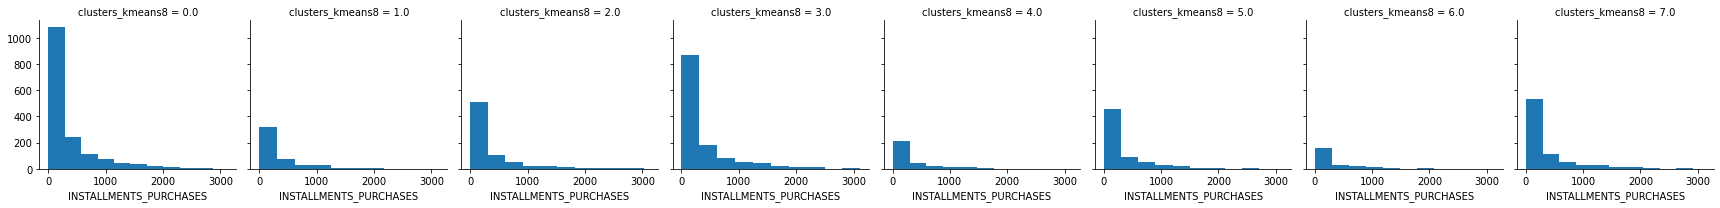

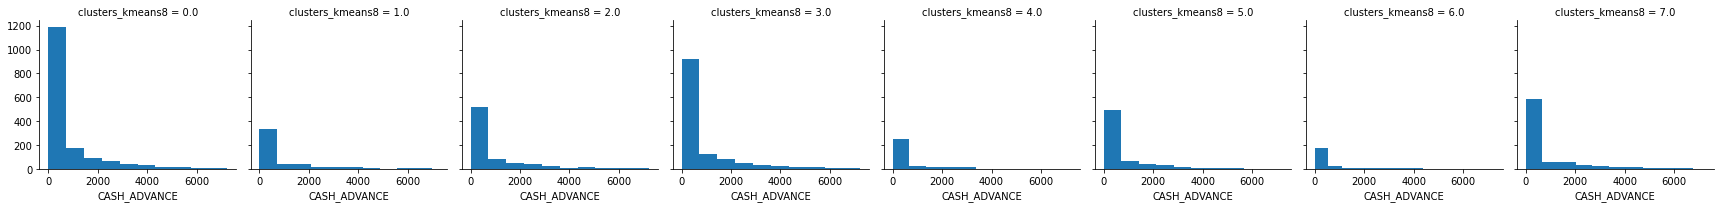

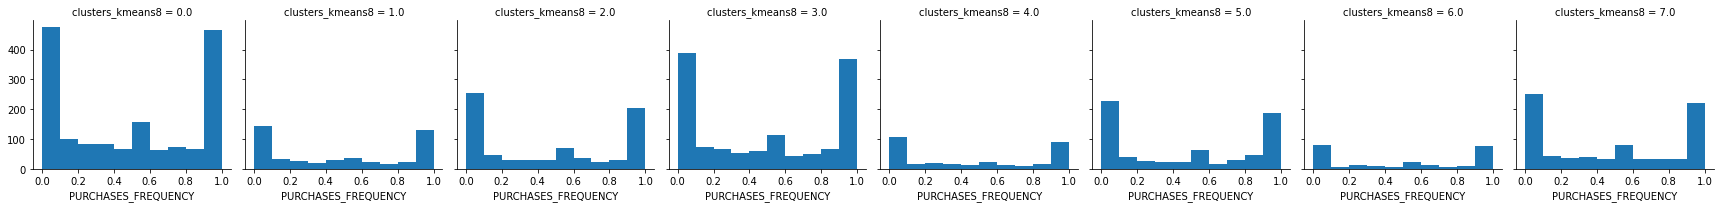

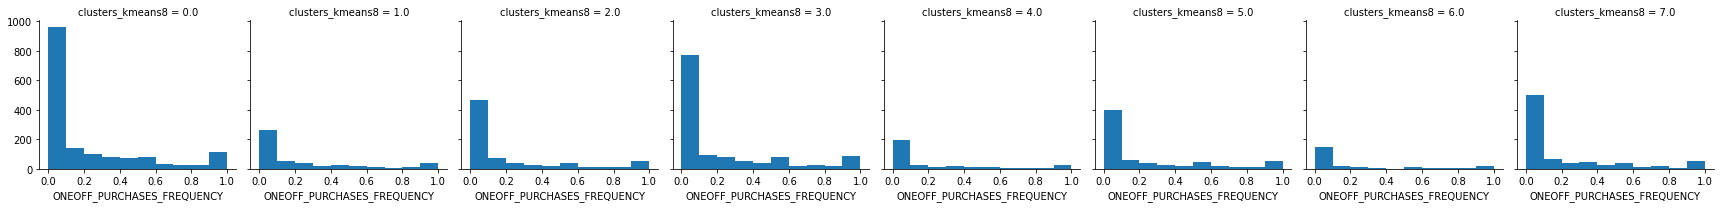

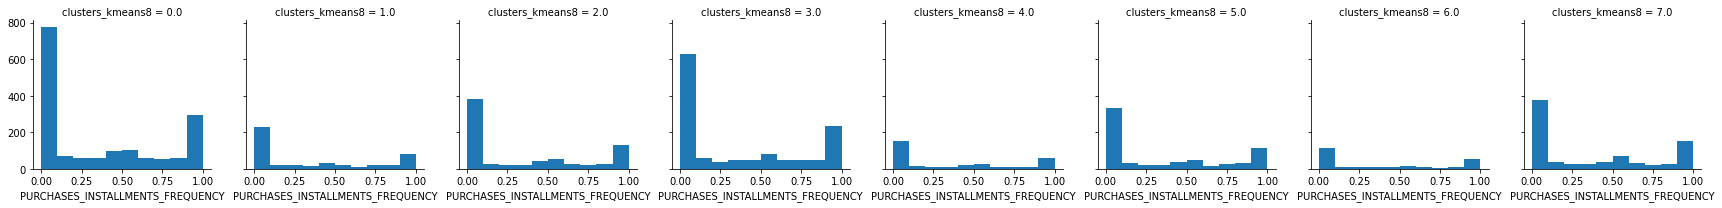

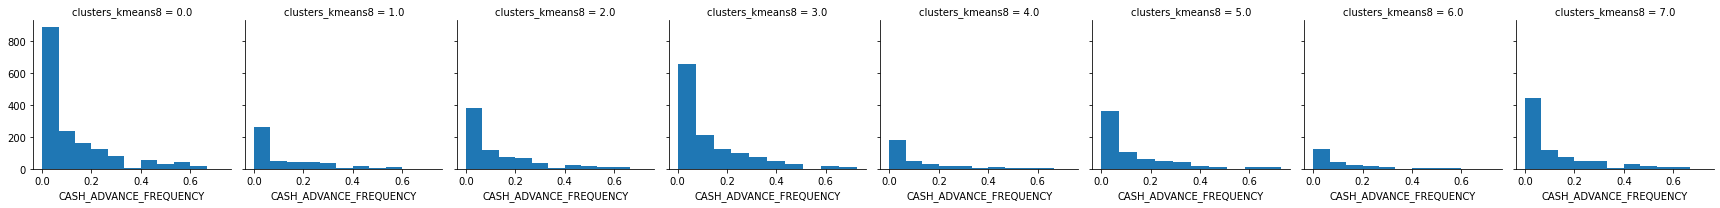

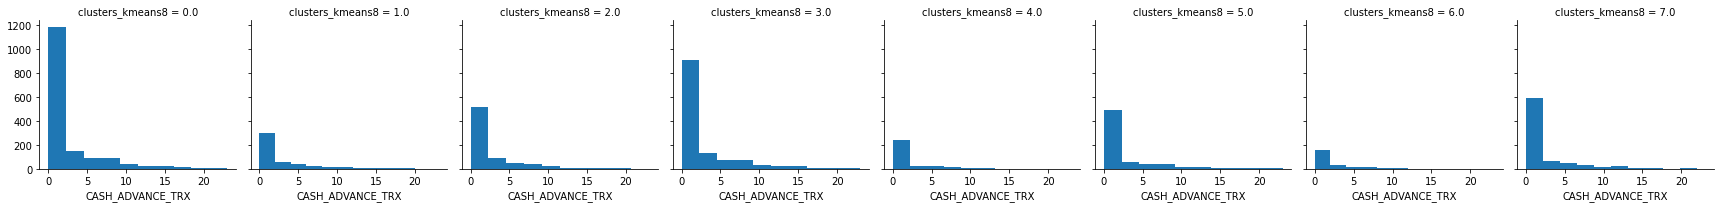

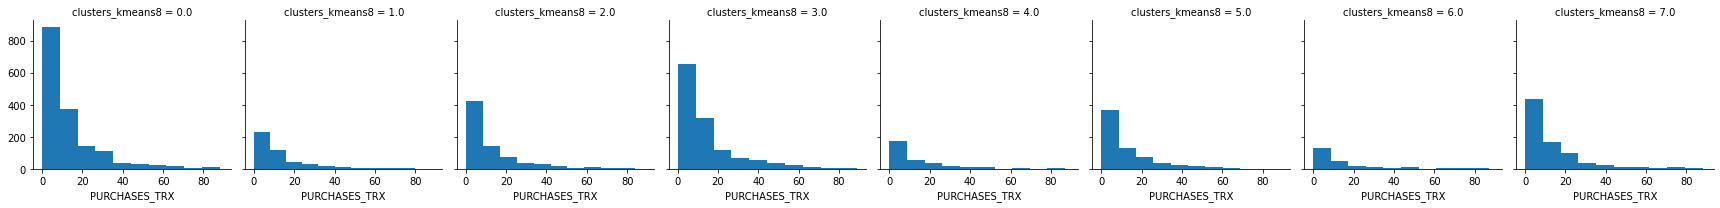

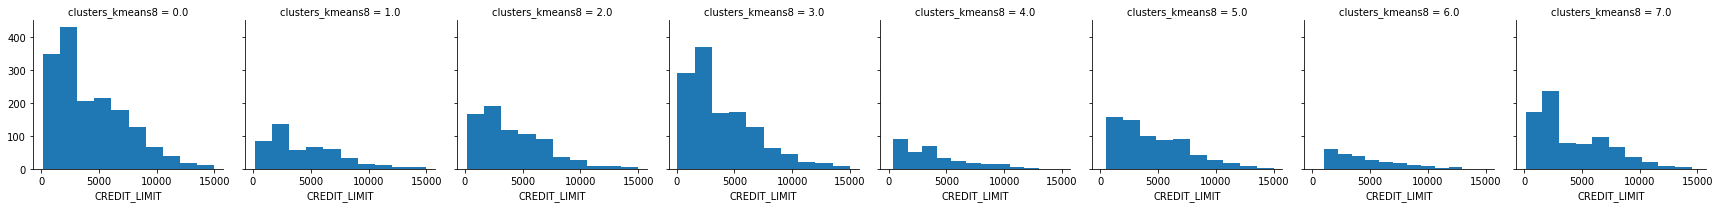

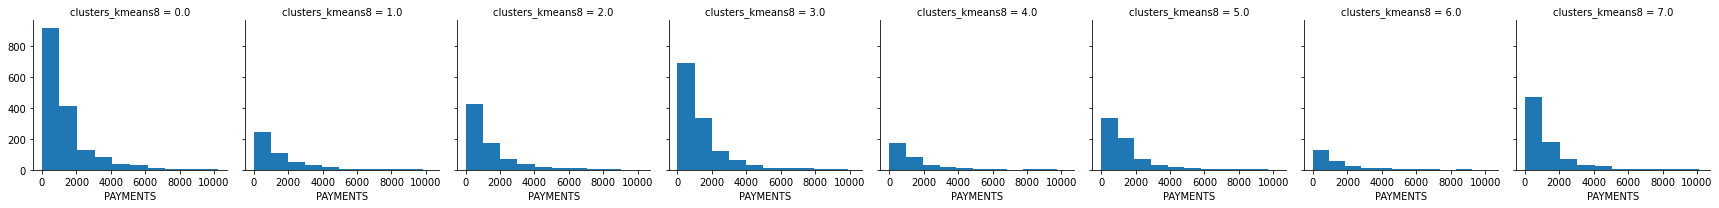

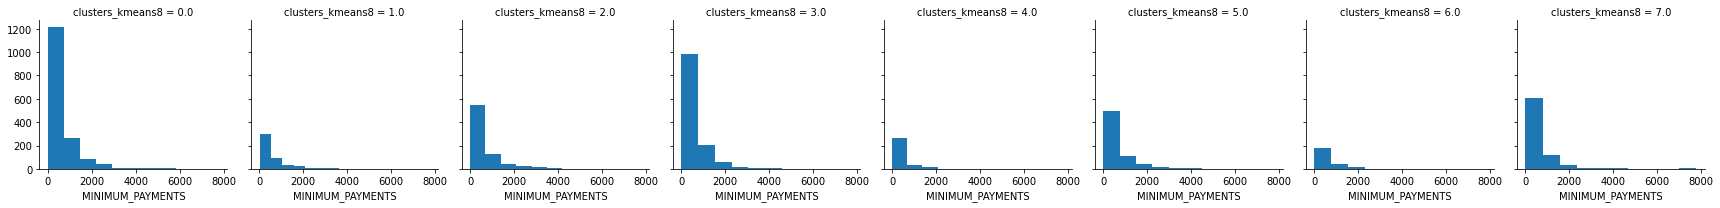

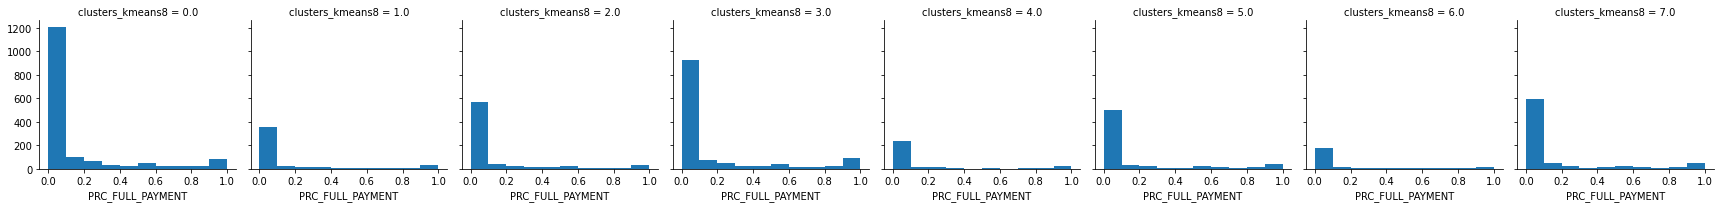

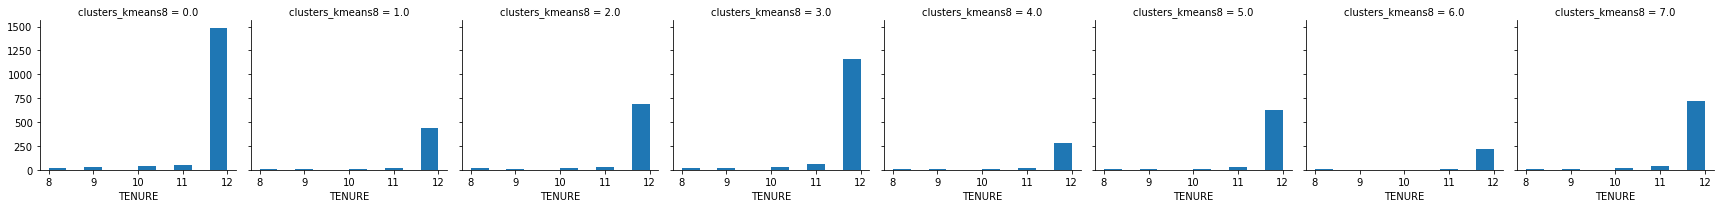

In [27]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_2, col = 'clusters_kmeans8')
    g.map(plt.hist, cols)

*Using ICA to visualize the obtainted clusters.*, using dimensionality reduction technique ICA to visualise the multidimensional array **

In [28]:
from sklearn.decomposition import FastICA
fast_ica = FastICA(2)
fast_ica.fit(affinities)
see_ICA = fast_ica.transform(affinities)

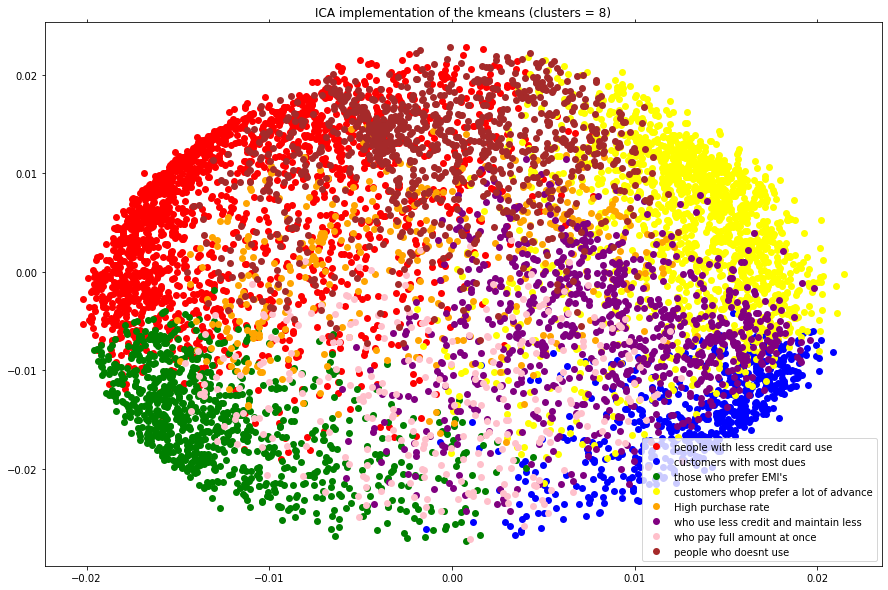

In [29]:
x, y = see_ICA[:, 0], see_ICA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          6: 'pink',
          7: 'brown'}

names = {0: 'people with less credit card use', 
         1: 'customers with most dues', 
         2: 'those who prefer EMI\'s', 
         3: 'customers whop prefer a lot of advance', 
         4: 'High purchase rate',
         5: 'who use less credit and maintain less',
         6: 'who pay full amount at once',
         7: 'people who doesnt use'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':k_means_8_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("ICA implementation of the kmeans (clusters = 8)")
plt.show()

3. **AFFINITY PROPAGATION**

In [30]:
#affinity propagation.
from sklearn.cluster import AffinityPropagation
affinity_propagation = AffinityPropagation(0.9)
affinity_propagation.fit(data_standardized)
affinity_propagation_labels = affinity_propagation.labels_

In [31]:
data_out_3 = pd.concat([data_out_2, pd.DataFrame({'affinity_propagation': affinity_propagation_labels})], axis = 1)

using single value decomposition to visualize the multidimensional data

In [32]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(7)
agglomerative_clustering.fit(data_standardized)
agglomerative_clustering_labels = agglomerative_clustering.labels_

In [33]:
data_out_4 = pd.concat([data_out_3, pd.DataFrame({'agglomerative_clustering': agglomerative_clustering_labels})], axis = 1)

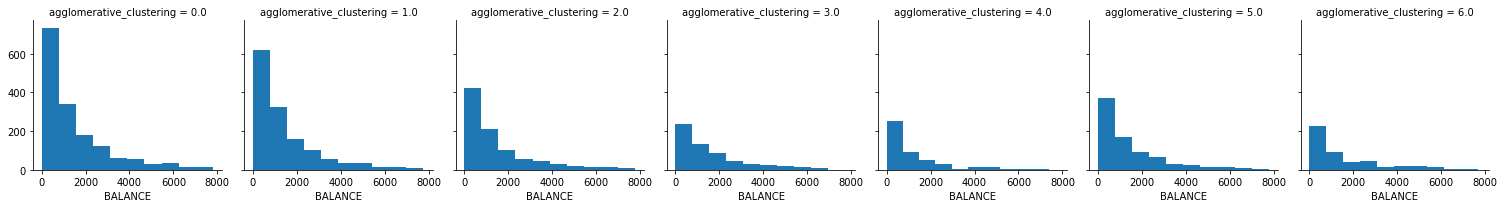

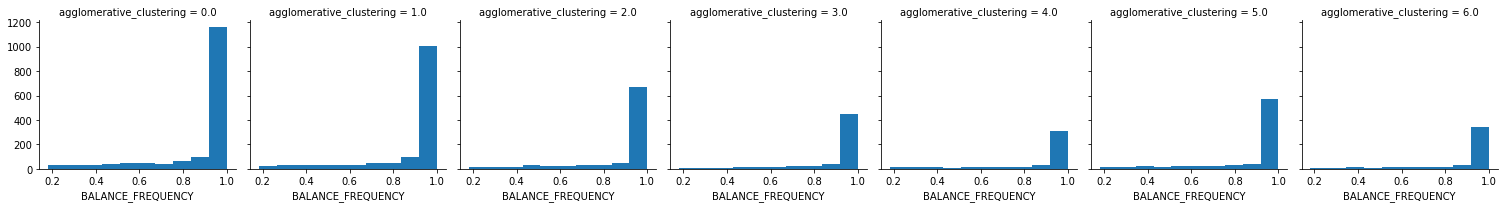

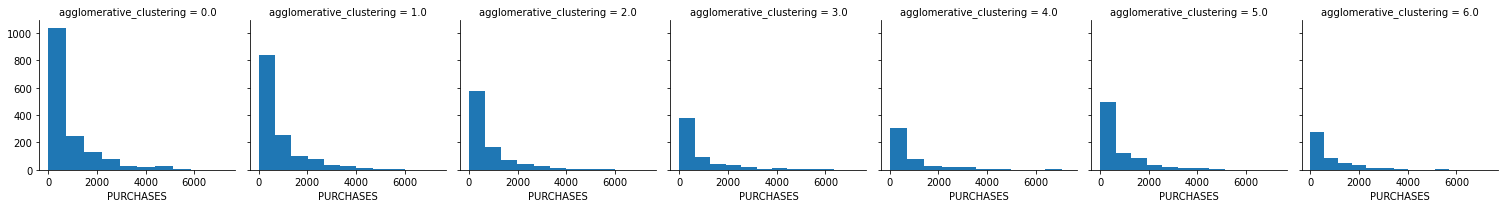

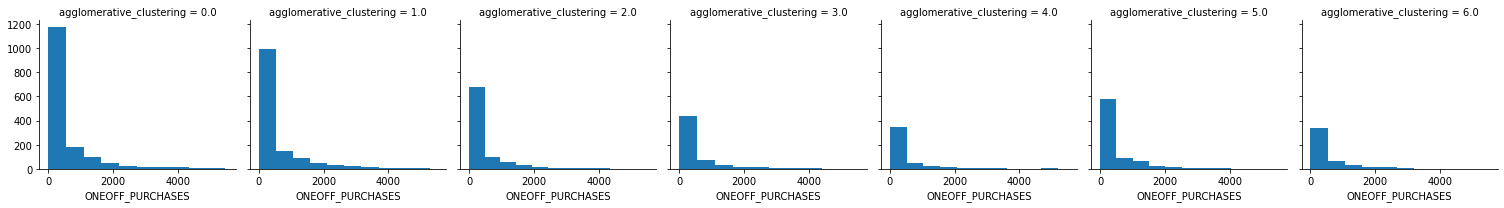

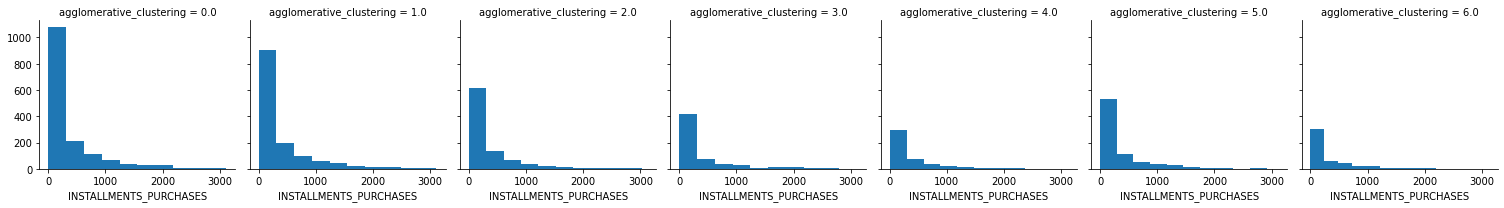

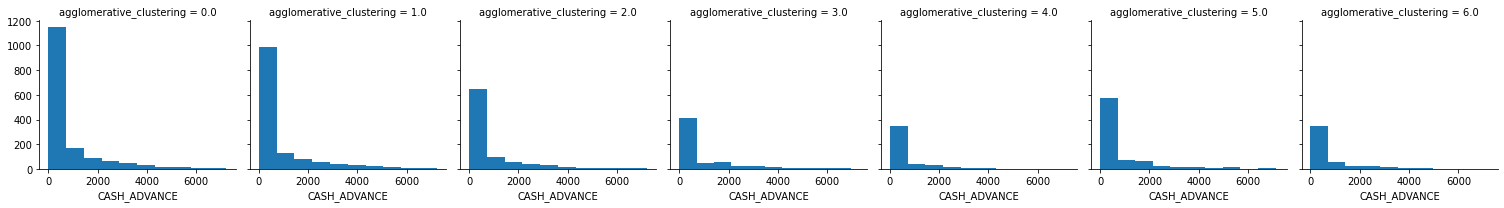

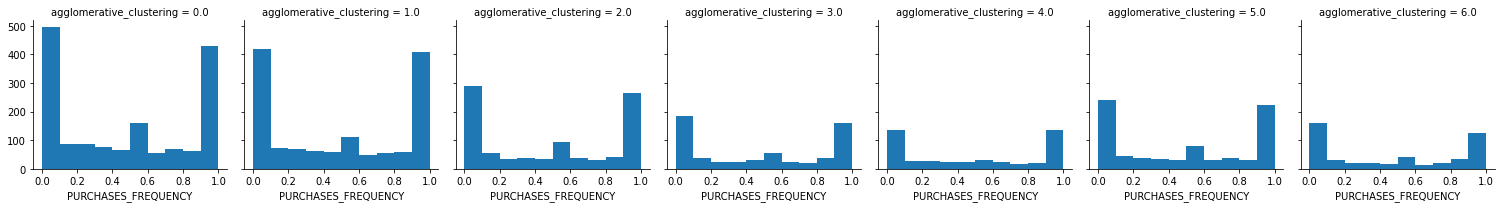

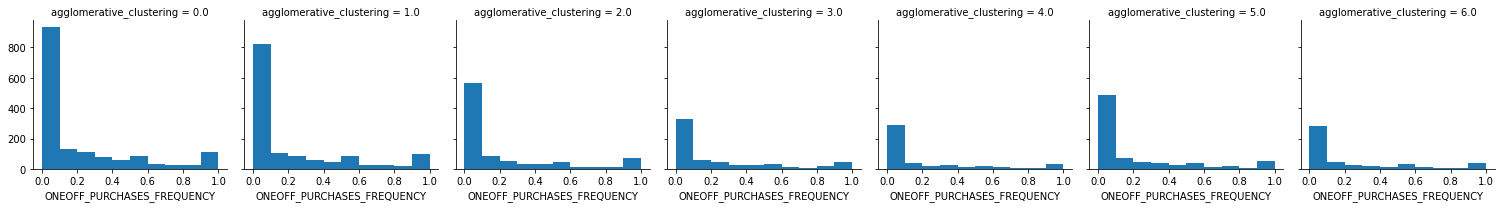

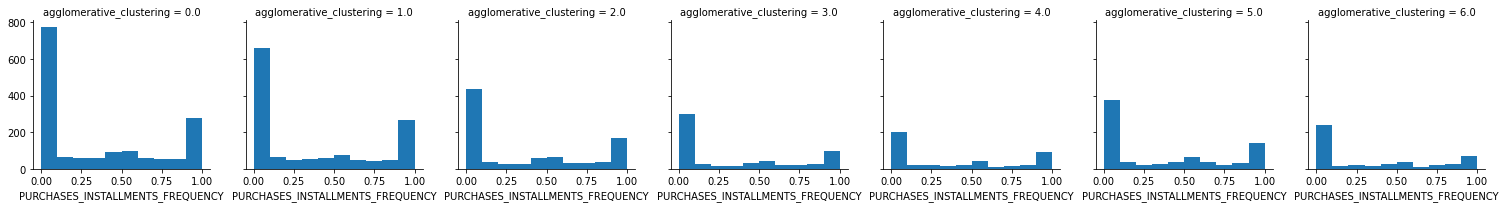

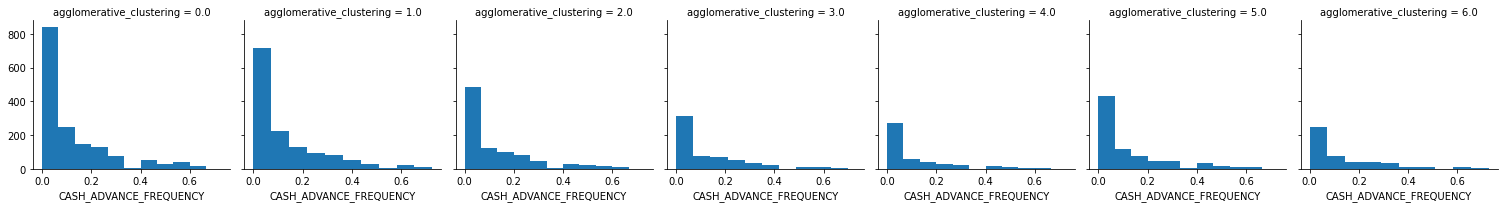

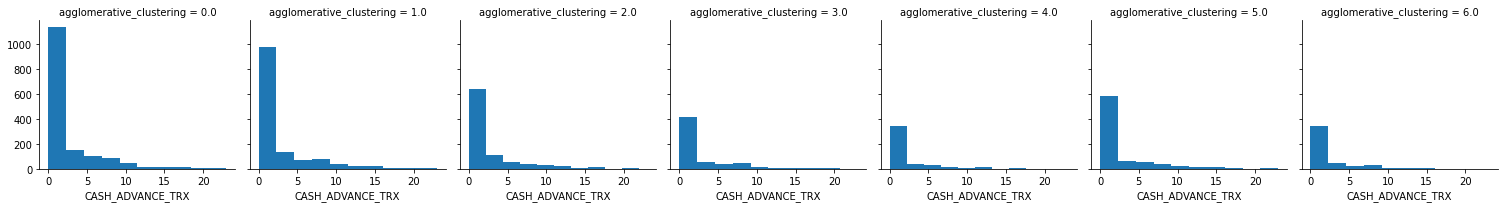

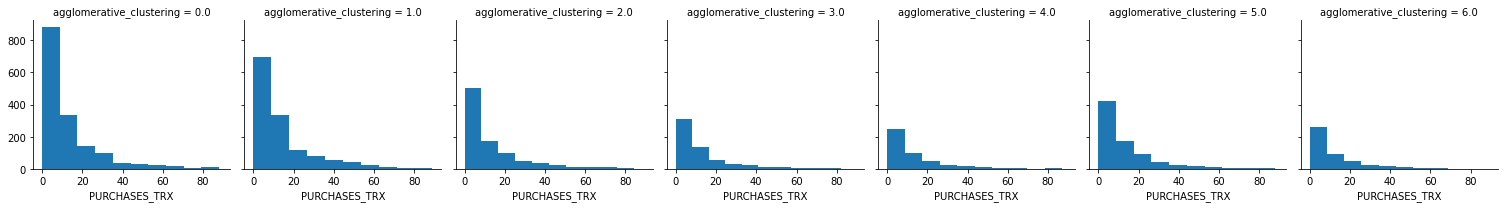

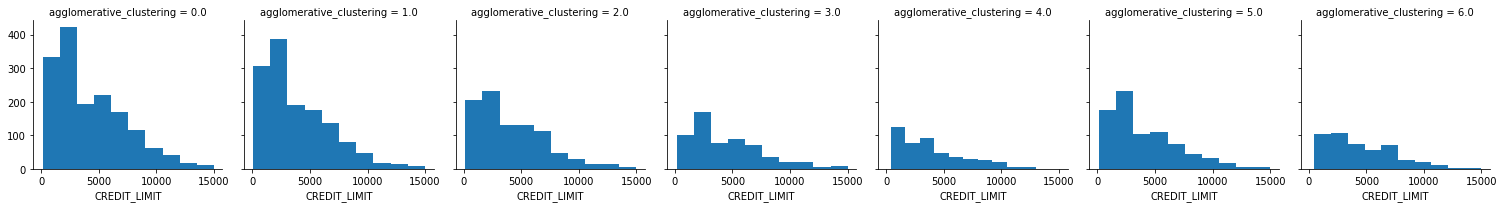

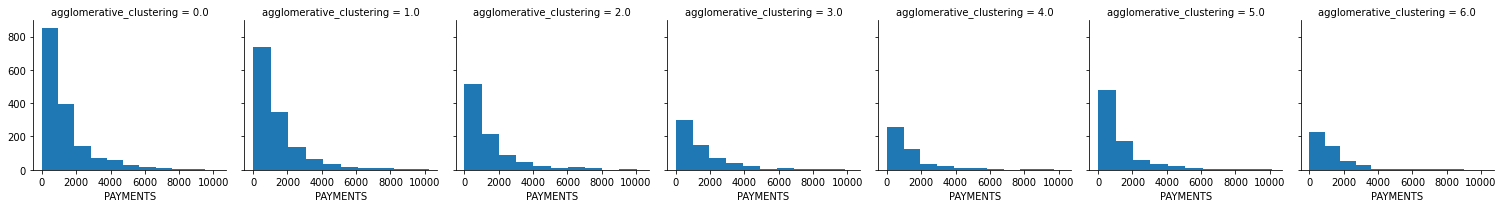

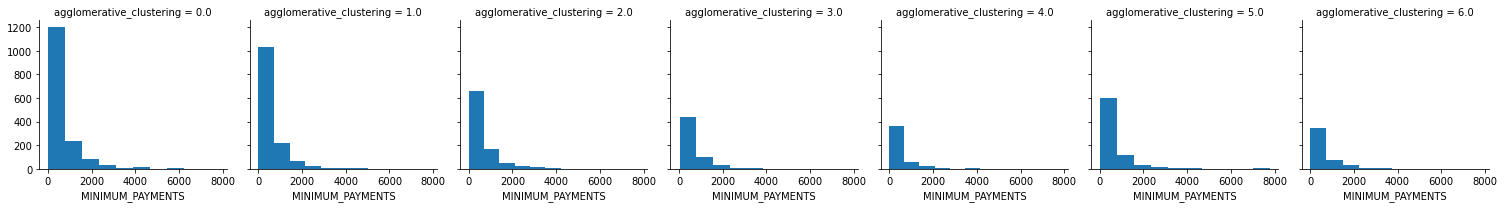

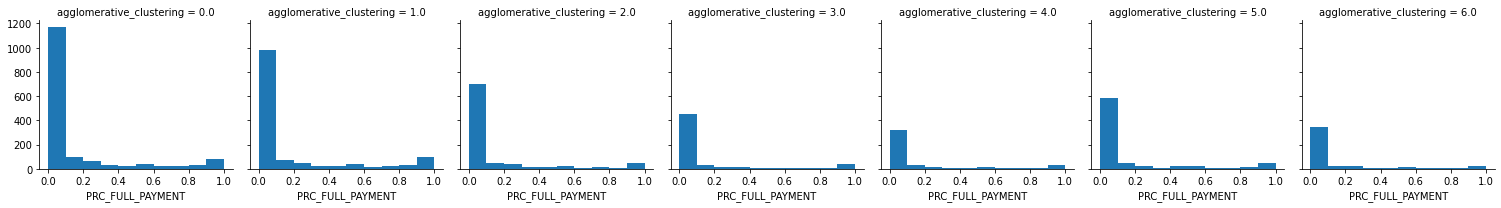

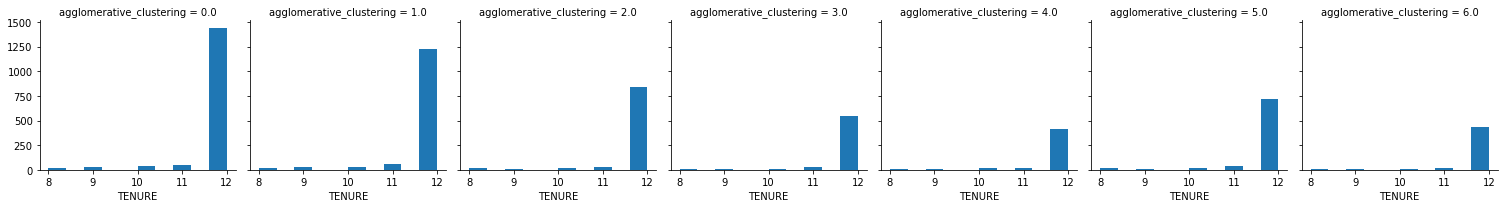

In [34]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_4, col ='agglomerative_clustering')
    g.map(plt.hist, cols)

In [35]:
from sklearn.decomposition import TruncatedSVD
truncated_svd = TruncatedSVD(2)
truncated_svd.fit(affinities)
see_SVD = truncated_svd.transform(affinities)

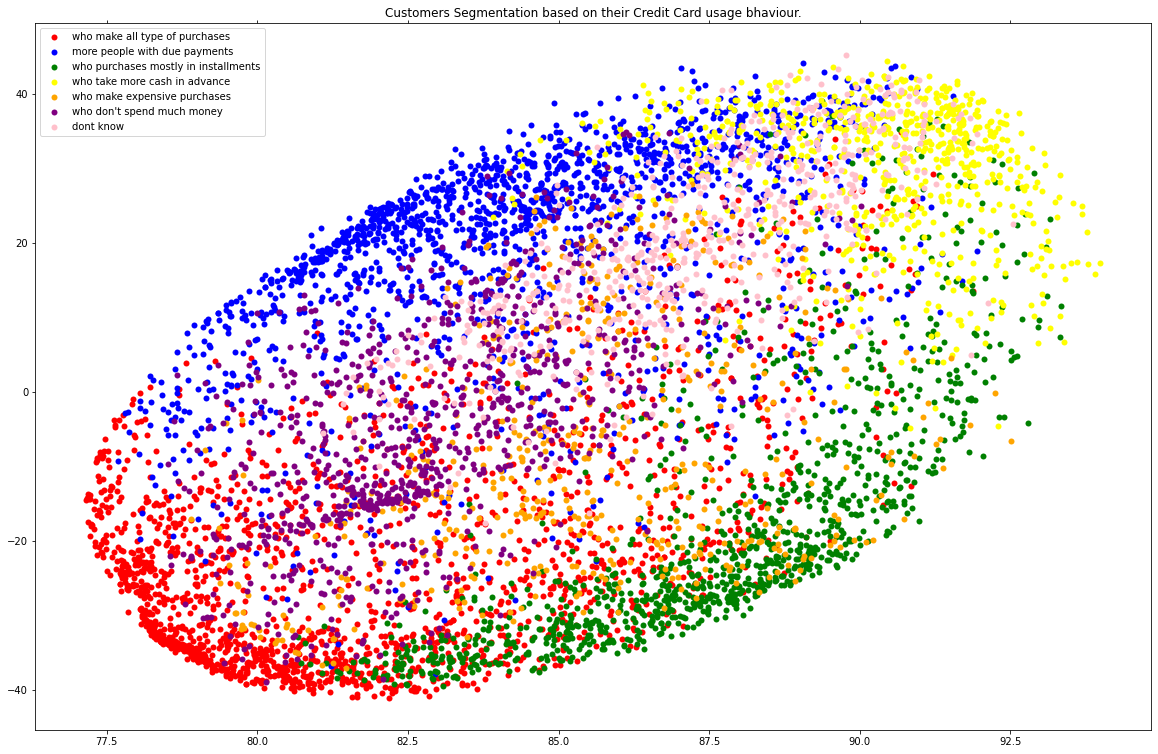

In [36]:
x, y = see_SVD[:, 0], see_SVD[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6: 'pink'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money',
         6: 'dont know'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label': agglomerative_clustering_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

4.DBSCAN:

In [37]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(data_standardized)
dbscan_labels = dbscan.labels_

In [38]:
data_out_5 = pd.concat([data_out_4, pd.DataFrame({'dbscan': dbscan_labels})], axis = 1)

In [39]:
data_out_5.dbscan.unique()

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 15., 23.,
       10., 11., 12., 13., 14., 19., 24., 16., 17., 20., 18., 21., 22.,
       nan])

In [40]:
from sklearn.manifold import Isomap
isomap = Isomap(len(data_out_5.dbscan.unique()), 2)
isomap.fit(affinities)
X_isomap = isomap.transform(affinities)


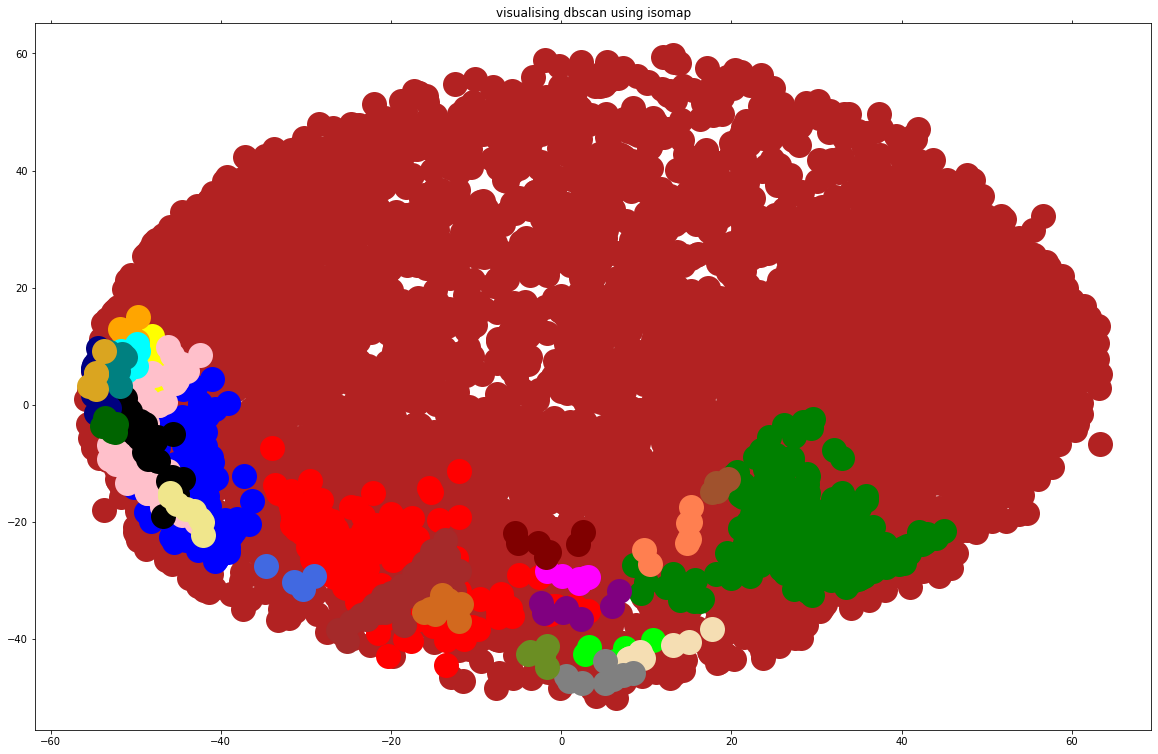

In [41]:
from matplotlib.colors import to_rgba
from matplotlib import colors as mcolors
x, y = X_isomap[:, 0], X_isomap[:, 1]


colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'orange', 5:'pink', 6:'brown', 7:'black',
          8:'khaki', 9:'lime', 10:'purple',
          11:'cyan', 12:'navy', 13:'chocolate', 14:'wheat', 15:'teal', 16:'magenta', 17:'coral',
          18: 'royalblue',19: 'maroon',20: 'grey',
          21:'darkgreen', 22:'olivedrab', 23:'goldenrod', -1:'firebrick', 24:'sienna'}
df = pd.DataFrame({'x': x, 'y':y, 'label':dbscan_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=25,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("visualising dbscan using isomap")
plt.show()

5. **OPTICS**

In [42]:
#OPTICS
from sklearn.cluster import OPTICS
optics = OPTICS()
optics.fit(data_standardized)
optics_labels = optics.labels_

In [43]:
data_out_6 = pd.concat([data_out_5, pd.DataFrame({'optics': optics_labels})], axis = 1)

In [44]:
data_out_6.optics.unique()

array([-1., 25., 10.,  9., 66., 84., 39., 52., 29., 16.,  0., 45., 37.,
       70., 32., 81., 63., 93., 28., 33., 71., 42., 60., 49., 86., 51.,
       91.,  3., 59., 30., 72., 41., 56., 13., 58.,  2.,  4., 73., 20.,
       18.,  1., 65., 57., 44., 27., 68., 69., 74., 80., 83., 40., 12.,
       21., 43., 62., 17., 64., 36., 38., 26., 77., 19., 46., 54., 35.,
       47., 82., 94., 23., 85., 31., 90., 88., 55., 22.,  8., 50.,  7.,
       79., 53., 89., 24., 76.,  6., 15., 48., 67., 75., 61., 34., 87.,
       11.,  5., 14., 92., 78., nan])

6.**Spectral Clustering**

In [45]:
#Spectral clustering:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(7)
spectral_clustering.fit(data_standardized)
spectral_clustering_labels = spectral_clustering.labels_

In [46]:
data_out_7 = pd.concat([data_out_6, pd.DataFrame({'spectral_clustering': spectral_clustering_labels})], axis = 1)

In [47]:
from sklearn.manifold import LocallyLinearEmbedding
locally_linear_embedding = LocallyLinearEmbedding(7, 2)
locally_linear_embedding.fit(affinities)
see_LLE = locally_linear_embedding.transform(affinities)

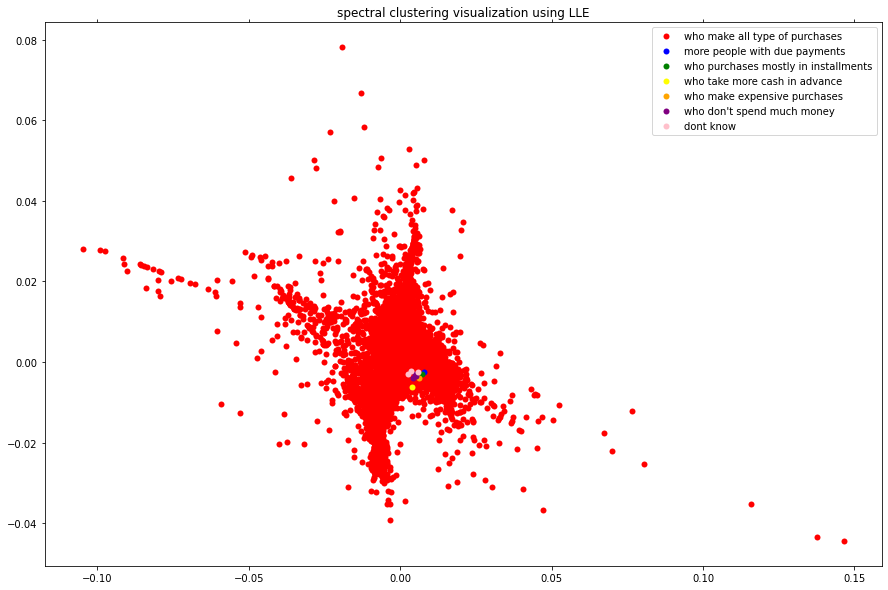

In [48]:
x, y = see_LLE[:, 0], see_LLE[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6: 'pink'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money',
         6: 'dont know'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label': spectral_clustering_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("spectral clustering visualization using LLE")
plt.show()